# Time series Forecasting for Airline Passengers:-

<img src="Airlinepassenger.jpg" width="">

# Contents

* Domain Analysis:-

            - Importing module
            - Reading data
            - Study dataset
        
* plot For showing Data pattern
* Decompose timeseries components
* ADFULLER TEST
* Differencing:-
  - Differencing 1
  - Differencing 2
* PLOT TO CHECK STATIONARY
* PLOTTING ACF AND PACF PLOT
* TRAINING AND TESTING OF DATA
* ARIMA MODEL
  - By Intuition:-
  
        - plot based Intuition
        - Plot for next 25 forecasts.
      
  - By Iterating:-
   
        - plot based Iterating
        - Plot for next 25 forecasts.
        
  -  Accuracy Matrics
  
* SARIMAX MODEL
  - Plot for next 10 forecast
  - Plot for next 25 forecast
  - Accuracy Metrics
* MODEL COMPARISON REPORT
* REPORT ON CHALLENGES FACED
* CONCLUSION

# Domain Analysis:-

### Importing Modules:-

For further process we have to import some important modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

So, we import pandas for data analysis.

NumPy for calculating N-dimensional array.

matplotlib to visualize the data

Statsmodels estimating and testing statistical models.

### Reading data
Generally, we use a dataset in the form of a CSV file, for reading this CSV file we will use the panda’s library, let’s see:

In [3]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


### Study Dataset
After reading the dataset we have to extract information from the data, for that we use the certain function:

In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

Insights:-There is one missing value in the 'Thousands of Passengers' column 

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df_airline.set_index('Month',inplace=True)

In [13]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


# plot For showing Data pattern

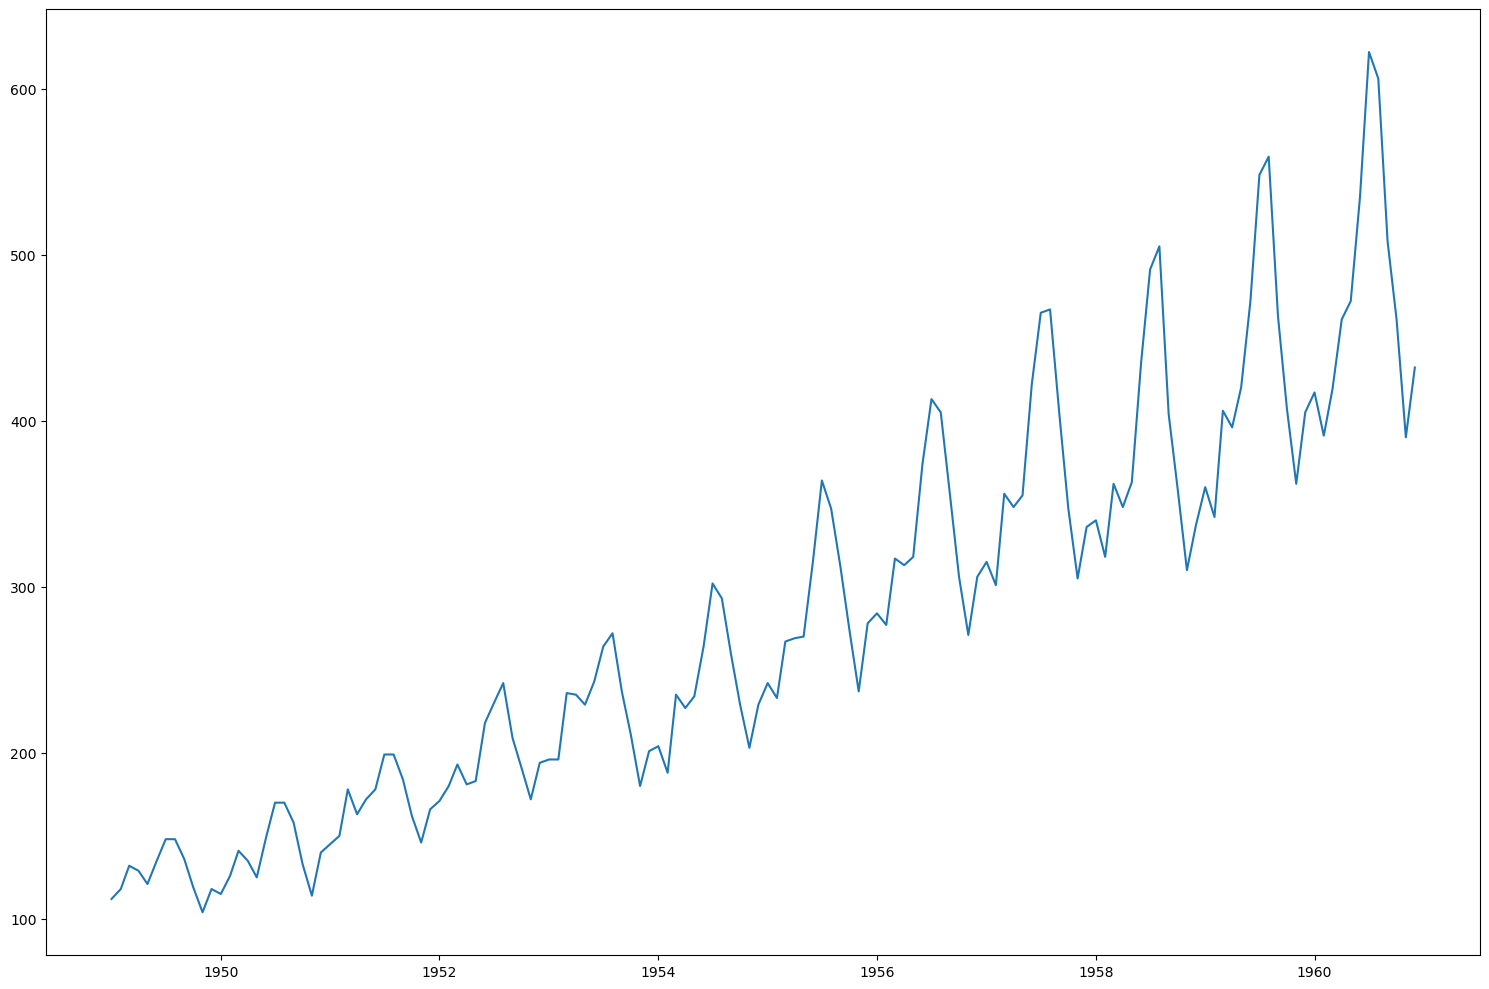

In [14]:
plt.figure(figsize=(15,10),facecolor='white')#canvas  size
plt.plot(df_airline)#line plot 
plt.tight_layout()

* It showing the upword trend in Timeseries

# Decompose time series components.

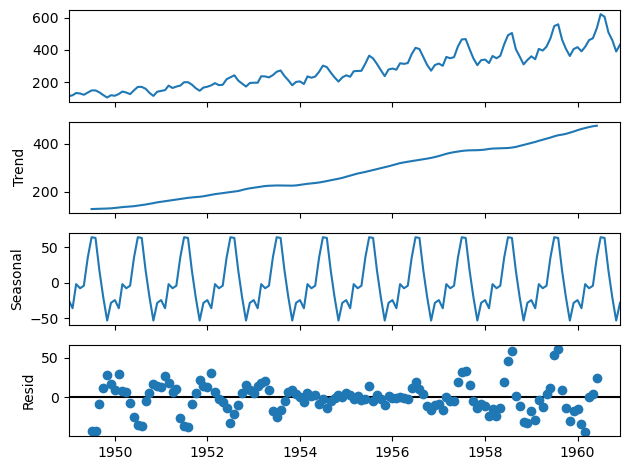

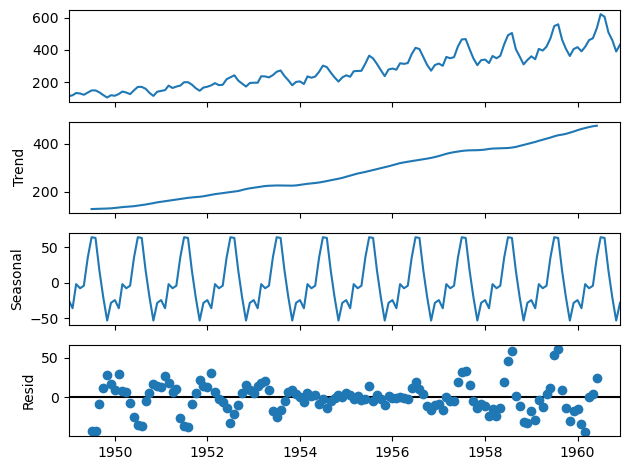

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_airline, model = "additive")
decompose_data.plot()

# AD-Fuller Test


In [16]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_airline['Thousands of Passengers'], autolag='AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  0.8153688792060547
2. P-Value :  0.9918802434376411
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


* As Test Statistics > Critical values and p-value > 0.05, the timeseries is not stationary so we have to make it stationary by differencing method.

# Differencing

### Differencing 1

In [17]:
data1=df_airline.diff(periods=1)
data1

,Thousands of Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [18]:
data1=data1.iloc[1:] #null value discarded

In [19]:
data1

,Thousands of Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [20]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data1['Thousands of Passengers'], autolag='AIC')

print("1. Test Statistics : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")

for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. Test Statistics :  -2.829266824170004
2. P-Value :  0.05421329028382491
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


* Again Test Statistics > Critical values and p-value > 0.05, the timeseries is not stationary so we have to make it stationary by differencing method.

### Differencing 2

In [21]:
data2=data1.diff(periods=1) # differencing applied to data1

In [22]:
data2=data2.iloc[1:]
data2

,Thousands of Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [23]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data2['Thousands of Passengers'], autolag = 'AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  -16.38423154246853
2. P-Value :  2.732891850014085e-29
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


* The p-value of 2.732891850014085e-29 is very small, much smaller than 0.05. Also our test statistics is smaller than critical values. Hence, we can say that our data is now stationary.

# Plot to check stationary

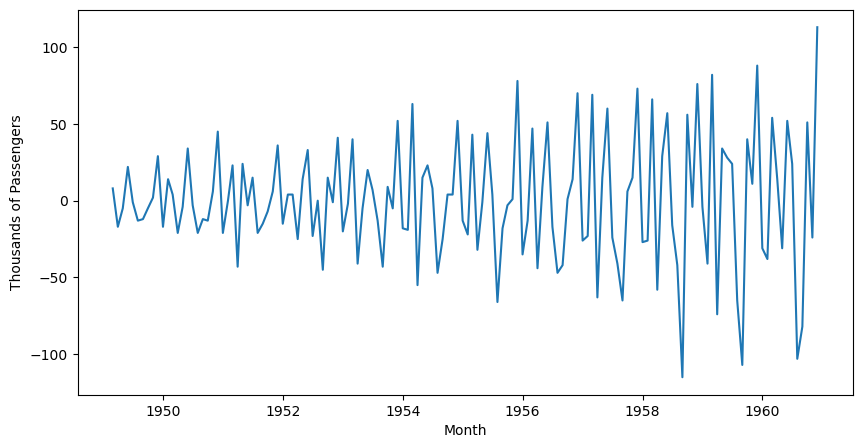

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=data2, x=data2.index, y=data2['Thousands of Passengers'])
plt.show()

* In this plot also, our standard deviation and mean are constant hence we can say it is stationary.

# Plotting ACF and PACF plot

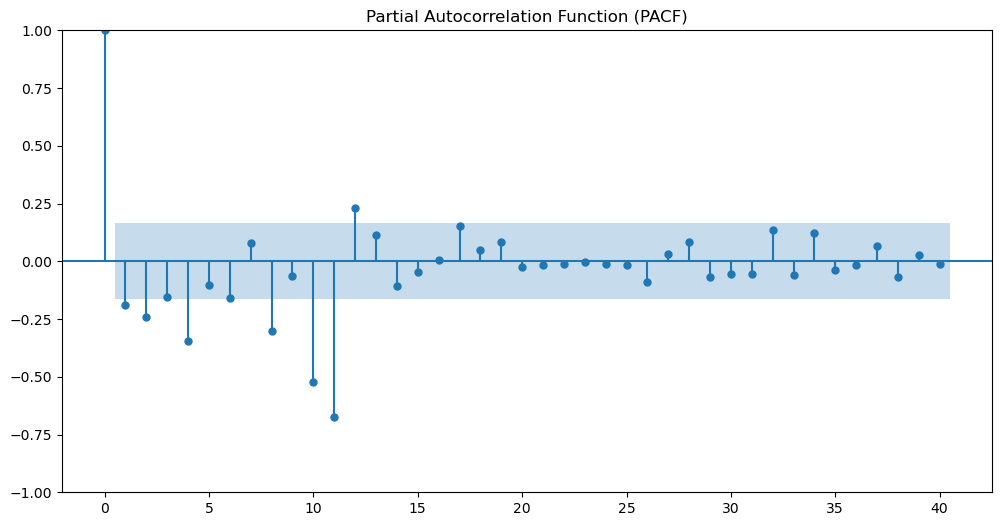

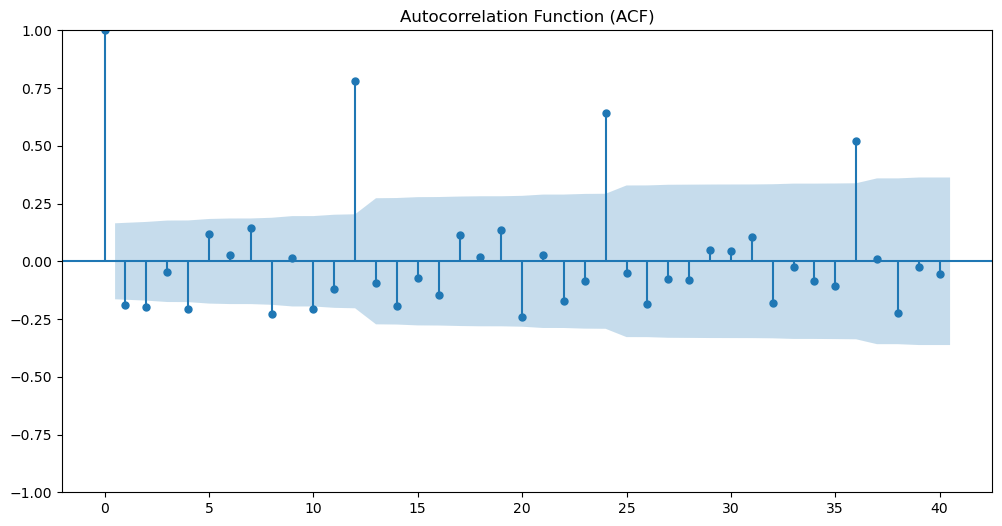

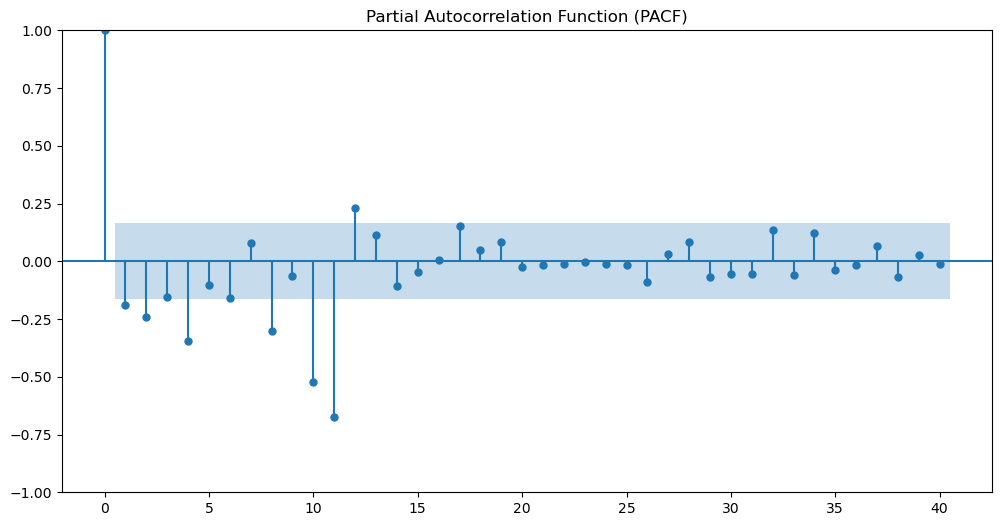

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data2, lags=40, ax=ax, title='Autocorrelation Function (ACF)')

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data2, lags=40, ax=ax, title='Partial Autocorrelation Function (PACF)')

* By the ACF and PACF plot we will take the q value as 2, and p value as 2 and d value will be 2 as we have done differencing 2 times.

In [26]:
data2.shape

(142, 1)

# Training and testing of data

In [27]:
## Creating training and test sets
train=data2[:110]
test=data2[110:] 

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1958-05-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


# ARIMA Model

In [29]:
import warnings
warnings.filterwarnings('ignore')

### By Intuition:-

In [30]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train, order=(2,2,2))#order= p,d,q #based on intuition 
model_arima_fit = model_arima.fit()

* I have taken the (p,d,q) value as (2,2,2) as intuition of acf and pacf plot.

In [31]:
print(model_arima_fit.aic)

1063.1073919828432


In [32]:
prediction_intuition = model_arima_fit.forecast(steps=10)

In [33]:
prediction_intuition

1958-05-01    -4.337929
1958-06-01    19.152972
1958-07-01    -5.080258
1958-08-01    -5.377694
1958-09-01     2.402301
1958-10-01     0.115244
1958-11-01    -1.736828
1958-12-01    -0.502827
1959-01-01    -0.332267
1959-02-01    -0.829128
Freq: MS, Name: predicted_mean, dtype: float64

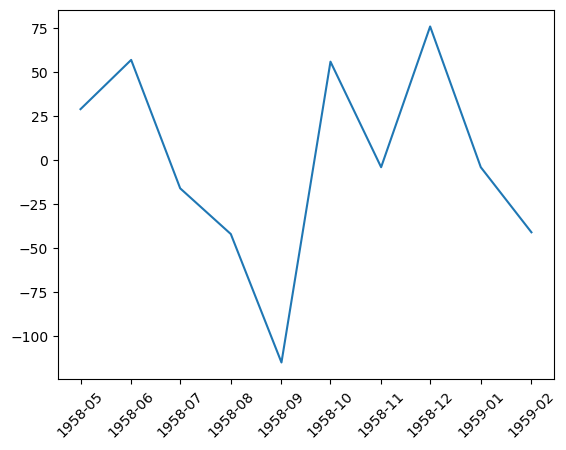

In [34]:
plt.plot(test[:10])
plt.xticks(rotation=45)
plt.show()

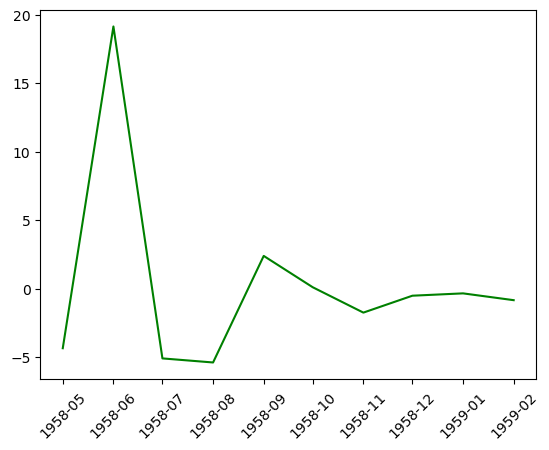

In [35]:
plt.plot(prediction_intuition,color='green')
plt.xticks(rotation=45)
plt.show()

### Plot based intuition

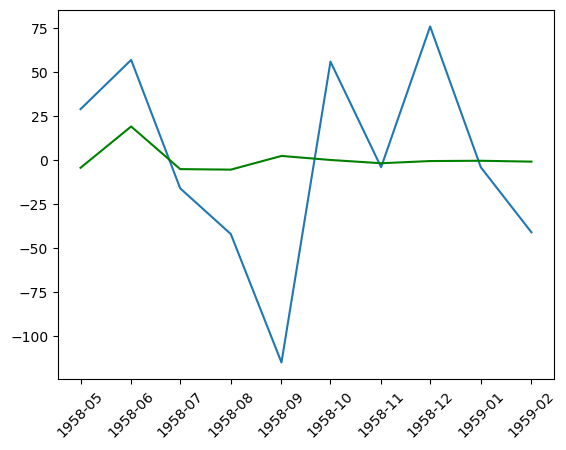

In [36]:
plt.plot(test[:10])
plt.plot(prediction_intuition,color='green')
plt.xticks(rotation=45)
plt.show()

In [37]:
forecast25_intuition = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([  29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,   -4.,
        -41.,   82.,  -74.,   34.,   28.,   24.,  -65., -107.,   40.,
         11.,   88.,  -31.,  -38.,   54.,   14.,  -31.])

### Plot for next 25 forecasts.

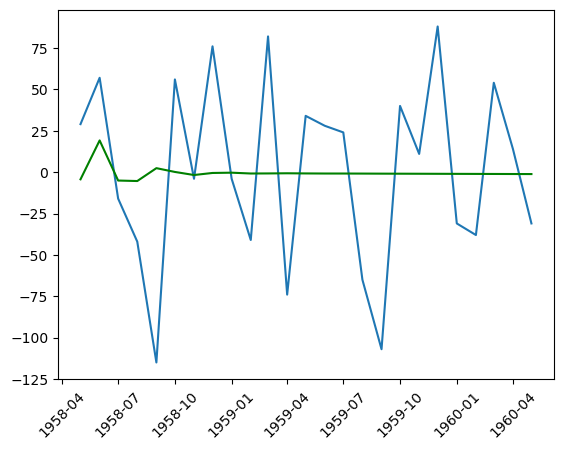

In [38]:
plt.plot(test[:25])
plt.plot(forecast25_intuition,color='green')
plt.xticks(rotation=45)
plt.show()

### By Iterating:-

In [39]:
import itertools
p =d= q=range(0,8)#values of p,d,q range from 0 to 5
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1,

In [40]:
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1077.142173643628
(0, 0, 1) 1038.4522058166217
(0, 0, 2) 1029.5508247669104
(0, 0, 3) 1025.1801732384056
(0, 0, 4) 1019.2164784429802
(0, 0, 5) 1007.4591598483253
(0, 0, 6) 1000.3423223153028
(0, 0, 7) 999.4857609876543
(0, 1, 0) 1164.018336398417
(0, 1, 1) 1073.0822030737327
(0, 1, 2) 1040.4251184171446
(0, 1, 3) 1030.5860728201287
(0, 1, 4) 1027.1891454948377
(0, 1, 5) 1041.955811932227
(0, 1, 6) 1013.3064072920733
(0, 1, 7) 1063.3565044506847
(0, 2, 0) 1268.9777701247438
(0, 2, 1) 1161.0238679494657
(0, 2, 2) 1075.5826976720045
(0, 2, 3) 1049.3334970346416
(0, 2, 4) 1096.9657379734174
(0, 2, 5) 1035.557026432696
(0, 2, 6) 1037.1931994564065
(0, 2, 7) 1021.0440631693359
(0, 3, 0) 1379.3571465964078
(0, 3, 1) 1264.8605800630685
(0, 3, 2) 1162.0490347906418
(0, 3, 3) 1082.0958843465307
(0, 3, 4) 1066.673120325514
(0, 3, 5) 1050.6583406914517
(0, 3, 6) 1094.917682323516
(0, 3, 7) 1116.4920331081275
(0, 4, 0) 1492.750590761728
(0, 4, 1) 1373.7880523017402
(0, 4, 2) 1264.2995851

(4, 4, 5) 1111.2768089840276
(4, 4, 6) 1143.1793957294005
(4, 4, 7) 1106.2663618123124
(4, 5, 0) 1328.2469178888828
(4, 5, 1) 1263.3861433113382
(4, 5, 2) 1206.589035751694
(4, 5, 3) 1269.7415203661449
(4, 5, 4) 1206.7584275934587
(4, 5, 5) 1168.8789904529458
(4, 5, 6) 1171.728675839716
(4, 5, 7) 1184.4402371344631
(4, 6, 0) 1393.0751893113595
(4, 6, 1) 1324.7152799910689
(4, 6, 2) 1264.651657892673
(4, 6, 3) 1342.8805419287946
(4, 6, 4) 1173.72956776273
(4, 6, 5) 1214.0415144353883
(4, 6, 6) 1179.9209984677
(4, 6, 7) 1209.9011970201495
(4, 7, 0) 1460.8580111269446
(4, 7, 1) 1388.0163784234348
(4, 7, 2) 1324.5078765198716
(4, 7, 3) 1268.7556477392343
(4, 7, 4) 1369.5727667373471
(4, 7, 6) 1373.1857164859036
(4, 7, 7) 1359.5123284627227
(5, 0, 0) 1046.7493069421175
(5, 0, 1) 1024.3378509061085
(5, 0, 2) 1021.8699446506388
(5, 0, 3) 1007.8789646785208
(5, 0, 4) 1006.5977784060805
(5, 0, 5) 988.7873363056502
(5, 0, 6) 1000.164158033004
(5, 0, 7) 997.0741814786546
(5, 1, 0) 1078.6020252201

In [41]:
min(list2)  # lowest aic score

10.0

In [42]:
loc=list2.index(min(list2))
list1[loc]

(2, 7, 2)

In [43]:
model_arima = ARIMA(train, order=(2, 7,2))
model_arima_fit2 = model_arima.fit()

In [44]:
prediction_iterating = model_arima_fit2.forecast(steps=10)
prediction_iterating 

1958-05-01    0.0
1958-06-01    0.0
1958-07-01    0.0
1958-08-01    0.0
1958-09-01    0.0
1958-10-01    0.0
1958-11-01    0.0
1958-12-01    0.0
1959-01-01    0.0
1959-02-01    0.0
Freq: MS, Name: predicted_mean, dtype: float64

### Plot based on iterating 

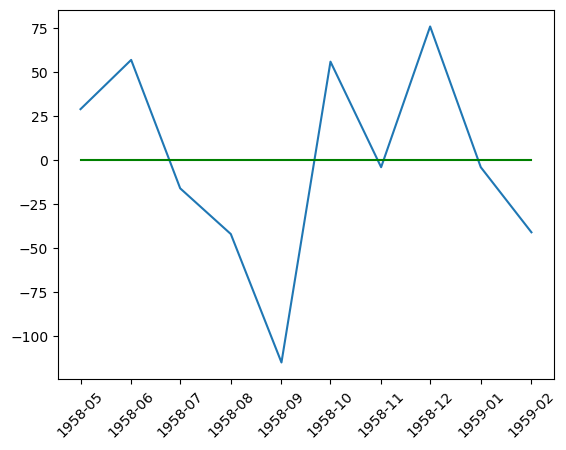

In [45]:
plt.plot(test[:10])
plt.plot(prediction_iterating,color='green')
plt.xticks(rotation=45)
plt.show()

In [46]:
forecast25_iterating = model_arima_fit2.forecast(steps=25)
test2 = test[0:25].values.flatten()
test2

array([  29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,   -4.,
        -41.,   82.,  -74.,   34.,   28.,   24.,  -65., -107.,   40.,
         11.,   88.,  -31.,  -38.,   54.,   14.,  -31.])

### Plot for next 25 forecasts.

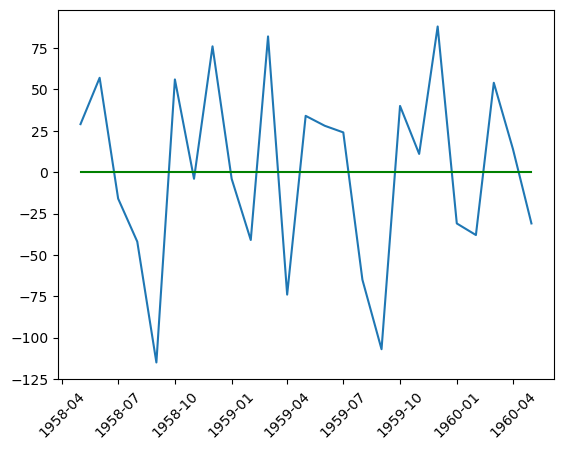

In [47]:
plt.plot(test[:25])
plt.plot(forecast25_iterating,color='green')
plt.xticks(rotation=45)
plt.show()

##### In the analysis, two plots were created: one using a intuition to select a specific pdq value, and another relying on Iterating approach to explore various parameter combinations (pdq). Surprisingly, the plot based on intuition performed better than the one derived from the iterative approach.

# Accuracy metrics

In [48]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25_intuition, test1)

{'mse': 2992.277664069487,
 'mae': 45.531137897365035,
 'rmse': 54.701715366791625}

In [49]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25_intuition))

54.701715366791625


* Our dataset contains so many confirmed cases so RMSE of 54.701715366791625 is reasonable.

# SARIMAX Model

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,2,2), seasonal_order=(2,2,2,12))
model_sarima = model.fit()

In [51]:
print(model_sarima.aic)

694.3591913418177


In [52]:
predictions_sarima = model_sarima.forecast(steps=10)

### Plot for next 10 forecasts.

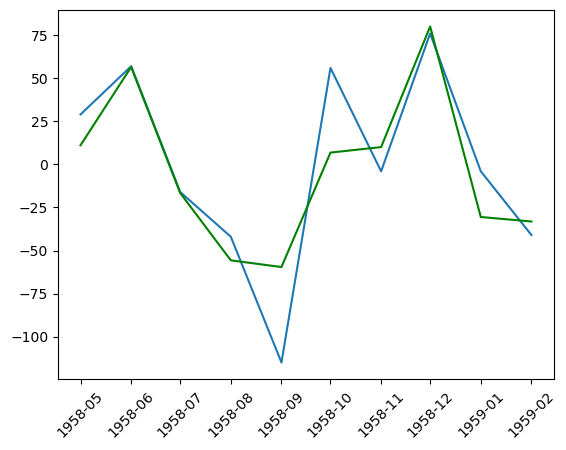

In [53]:
plt.plot(test[:10])
plt.plot(predictions_sarima,color='green')
plt.xticks(rotation=45)
plt.show()

In [54]:
forecast25_sarima = model_sarima.forecast(steps=25)
test3 = test[0:25].values.flatten()
test3

array([  29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,   -4.,
        -41.,   82.,  -74.,   34.,   28.,   24.,  -65., -107.,   40.,
         11.,   88.,  -31.,  -38.,   54.,   14.,  -31.])

### Plot for next 25 forecasts

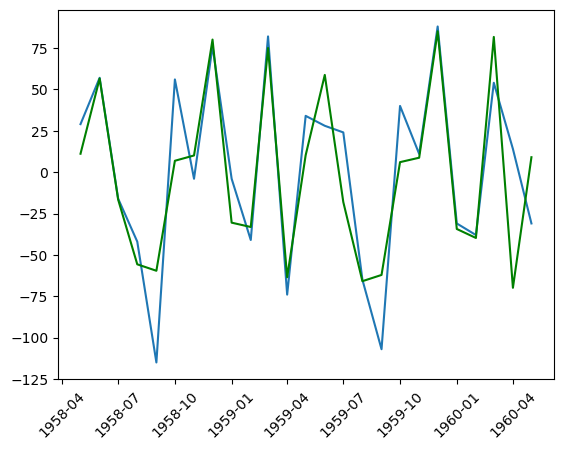

In [55]:
plt.plot(test[:25])
plt.plot(forecast25_sarima,color='green')
plt.xticks(rotation=45)
plt.show()

# Accuracy Metrics


In [56]:
forecast_accuracy(forecast25_sarima, test3)

{'mse': 920.4282539437818, 'mae': 21.81214353118706, 'rmse': 30.33856051205762}

In [57]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test3, forecast25_sarima))

30.33856051205762


# Model Comparison Report
#### RMSE Score for the model

* ARIMA : 54.70


* SARIMAX : 30.33

##### The SARIMAX model outperforms the ARIMA model in terms of prediction accuracy, as indicated by the lower RMSE score (30.33  versus   54.70).

# Report on Challenges Faced


In the analysis of airline passenger data, challenges were encountered in accurately determining time series model parameters. The intuitive selection of (p,d,q) values, guided by ACF and PACF plots, outperformed the iterative approach. This highlights the difficulty in navigating the complex parameter space for optimal forecasting. Despite achieving a lower RMSE score with SARIMAX, addressing challenges such as seasonality and external factors remains crucial for enhancing predictive accuracy in airline passenger data analysis.

# Conclusion:-


In conclusion, analyzing airline passenger data presents challenges such as seasonality management, outlier handling, and precise model parameter determination. Despite these complexities, an intuitive approach, guided by ACF and PACF plots, proved more effective than a systematic iterative exploration in selecting optimal (p,d,q) values. The superior predictive accuracy of SARIMAX over ARIMA, evident in the significantly lower RMSE score (30.33 versus 54.70), underscores the importance of leveraging intuition in time series modeling for improved forecasting outcomes.

# Thank you for taking the time to review this project.

Best regards,

Aarti D Valase